# Lognormality - Chapther 23

* In this notebook we will explore the normality assumption with respect to stock prices
* Recall that the continously compunded percentage change is normally distributed
$ ln(S_t/S_0) = X \sim \mathcal{N}(\mu,\sigma^{2}) $
* Let us first simulate some data, to make sure that we have understood it

In [1]:
import numpy as np # Numerical library in Python
import pandas as pd # Provides high-performance, easy-to-use data structures and data analysis tools

mu = 0 # Average (or drift in a GBM)
sigma = 1 # Volatility 
data = np.random.normal(loc=mu, scale=sigma, size=1000) # Simulate some standard normal random numbers

* Next we can plot the siumated data against the normal distribution

<IPython.core.display.Javascript object>


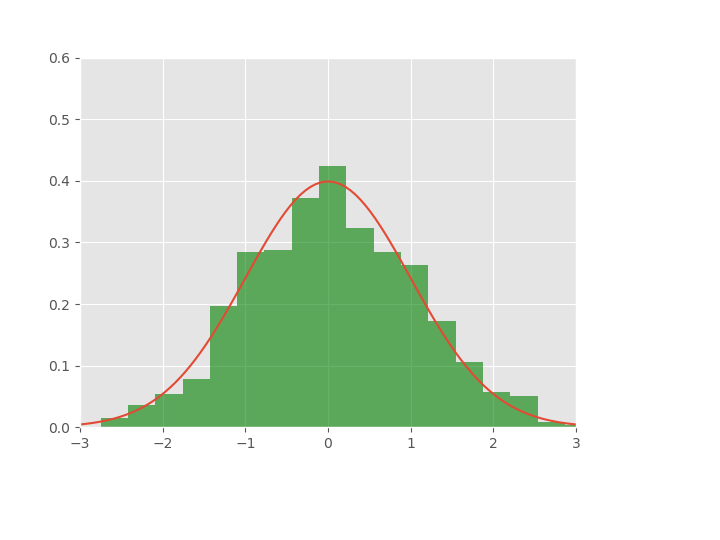

interactive(children=(FloatSlider(value=0.0, description='mu', max=1.0, min=-1.0, step=0.05), FloatSlider(valu…

<function __main__.update(mu=0.0, sigma=1)>

In [2]:
%matplotlib notebook
from ipywidgets import *
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use('ggplot') # sets the style to create nicer graphs


# start plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xmin = -3 
xmax = 3
n = 100 # number of datapoints used to calcualte x
x = np.linspace(xmin, xmax, n) # values where we evaluate the pdf.
p = norm.pdf(x, mu, sigma)
line, = ax.plot(x,p) # inserts the theoretical pdf.

ax.hist(data, bins=25, density=True, alpha=0.6, color='g') # insert histogram for our simulated data


# Plot the pdf
mu_widget = FloatSlider(min=-1, max=1, step=0.05)
sigma_widget = FloatSlider(min=0.5, max=1.5, step=0.05, value = 1)

# Include an update function
def update(mu = 0.0, sigma = 1):
    x = np.linspace(xmin, xmax, n)
    p = norm.pdf(x, mu, sigma)
    ax.cla()
    ax.plot(x,p)
    updated_data = (data + mu)*sigma
    ax.hist(updated_data, bins=25, density=True, alpha=0.6, color='g')
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([0, 0.6])
    fig.canvas.draw()

interact(update, mu=mu_widget, sigma=sigma_widget)

### Lognormal transformation
* In this section we transform our normally distributed data into lognormally distribution data
* Recall if:
    * $  X \sim \mathcal{N}(\mu,\sigma^{2}) $  then $y=e^{x}$ is lognormally distributed
* We can now compare $y=e^{x}$ to the theoretical lognormal distribution

<IPython.core.display.Javascript object>


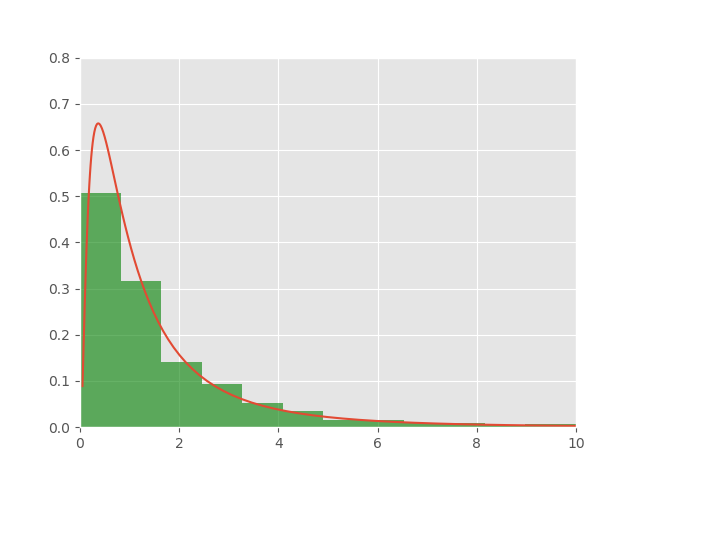

interactive(children=(FloatSlider(value=0.0, description='mu', max=1.0, min=-1.0, step=0.05), FloatSlider(valu…

In [3]:
%matplotlib notebook
from scipy.stats import lognorm

plt.style.use('ggplot') # sets the style to create nicer graphs
n = 100

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#hist = ax.
x = np.exp(np.linspace(xmin, xmax, n))
p = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
                / (x * sigma * np.sqrt(2 * np.pi)))
line, = ax.plot(x,p)

lognorm_data = np.exp(data)
ax.hist(lognorm_data, bins=30, density=True, alpha=0.6, color='g')
xmin = 0
xmax = 10

# Plot the PDF.

mu_widget = FloatSlider(min=-1, max=1, step=0.05)
sigma_widget = FloatSlider(min=0.5, max=1.5, step=0.05, value = 1)

def update(mu = 0.0, sigma = 1):
    p = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
                / (x * sigma * np.sqrt(2 * np.pi)))
    ax.cla()
    ax.plot(x,p)
    updated_data = np.exp((data + mu)*sigma)
    ax.hist(updated_data, bins=30, density=True, alpha=0.6, color='g')
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([0, 0.8])
    fig.canvas.draw()

interact(update, mu=mu_widget, sigma=sigma_widget);



* Notice that, we use the moments from the normal distribution 

## Comparison with real data
### Importing data into notebook

* Here we seek to compare real data with our underlying assumption about normality
* As an example we use Alphabet (Google)
 * Daily data is retrieved from: https://finance.yahoo.com/quote/GOOG/history?p=GOOG.
* First, let us import the data and set time as index

In [4]:
df = pd.read_csv("GOOG.csv") # imports csv into working memory
df.index = pd.to_datetime(df['Date']) # changes the index to the current date
df["log_diff"] = np.log(df["Adj Close"]).diff() # takes the log-difference

* The Pandas library offers us capabilities to quickly inspect the data visually

In [5]:
df.head() # first five observations
#df.tail() # five last observations

,Date,Open,High,Low,Close,Adj Close,Volume,log_diff
Date,,,,,,,,
2004-08-19,2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500,NaN
2004-08-20,2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800,0.076433
2004-08-23,2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200,0.010013
2004-08-24,2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800,-0.042289
2004-08-25,2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400,0.010718


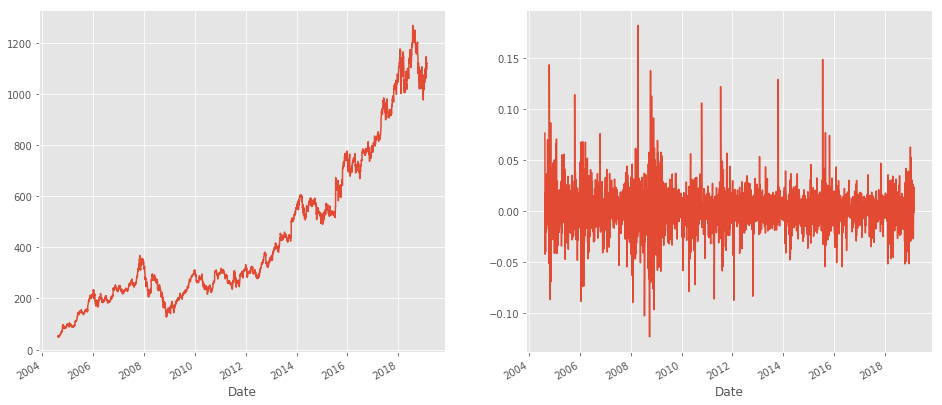

In [6]:
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

df["Adj Close"].plot(ax=axes[0])
df["log_diff"].plot(ax=axes[1]);

* We calculate the annual mean and standard deviation by adjusting for days per year

In [7]:
nDays = len(df)/(2019-2004) # How many days per year?
std = np.std(df["log_diff"])*np.sqrt(nDays) # Convert to yearly
print(f'Annual standard deviation: {std}')
mean = np.mean(df["log_diff"])*nDays + 0.5*std**2
print(f'Annual expected return: {mean}')

Annual standard deviation: 0.29586867518890814
Annual expected return: 0.2513122151272563


* That return seems really high
* Let us check our average return calculation

In [8]:
daily_average = np.mean(df["log_diff"])
number_of_days = (len(df["log_diff"])-1)
total_return = df["Adj Close"][0]*np.exp(daily_average * number_of_days)
print(f'Current stock price based on continiously compounded return: {total_return}')
print(f'Current stock price: {df["Adj Close"][-1]}')


Current stock price based on continiously compounded return: 1120.160034
Current stock price: 1120.160034


## Normality assumption
* Let us check how our normality assumption stacks up against the observed prices
* We can use both a histogram (left panel) and or a qunatile plot (right panel)

<IPython.core.display.Javascript object>


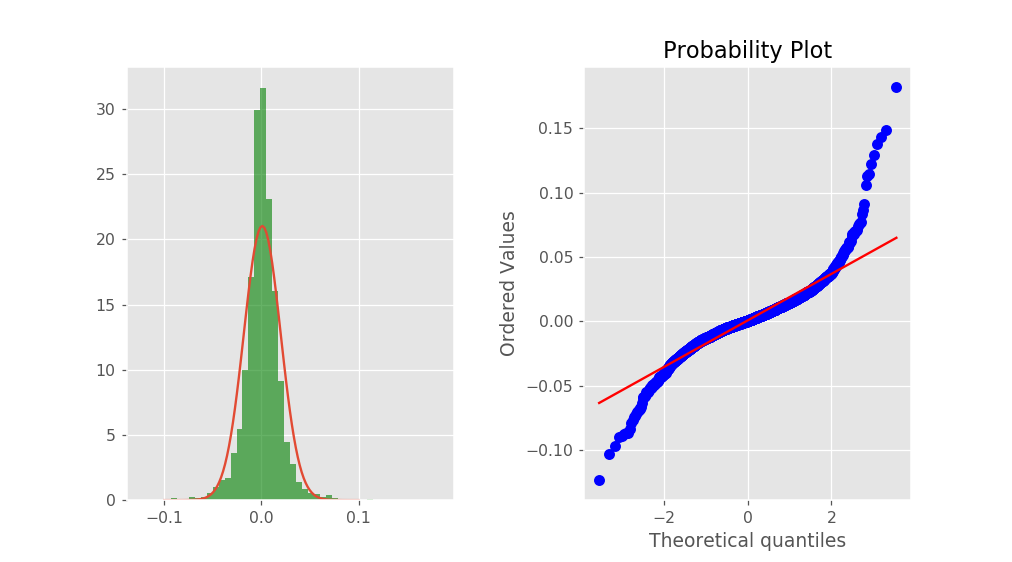

In [9]:
%matplotlib notebook
from scipy import stats

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(1, 2, 1)
xmin = -0.1 
xmax = 0.1
x = np.linspace(xmin, xmax, n)
p = norm.pdf(x, np.mean(df["log_diff"]), np.std(df["log_diff"]))
line, = ax.plot(x,p)

ax.hist(df["log_diff"][1:], bins=50, density=True, alpha=0.6, color='g')

plt.subplots_adjust(wspace = 0.4) # adding some space betwen graphs
# Quantile plot
ax2 = fig.add_subplot(1, 2, 2)
stats.probplot(df["log_diff"][1:], plot=ax2)

print("")